In [52]:
"""
Principal Component Analysis applied to the Iris dataset.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # import class
from sklearn.cross_validation import cross_val_score

from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

In [53]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [54]:
# KNN with the original iris
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.96666666666666679

In [55]:
#############################
### PCA with 2 components  ##
#############################

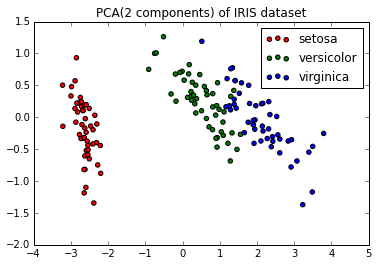

In [56]:
pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

Note the axis are not the same anymore! They are no longer anything such as "sepal length" or "petal width"

In [57]:
X_transformedSK = pca.transform(X)

In [58]:
X_transformedSK
# only 2 columns!!

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

In [59]:
# KNN with PCAed data
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_transformedSK, y, cv=10, scoring='accuracy').mean()

0.96000000000000019

In [60]:
X_reconstituted = pca.inverse_transform(X_transformedSK)
# Turn it back into its 4 column using only 2 principal components

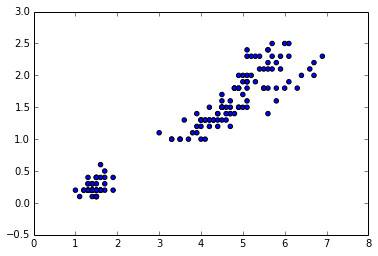

In [61]:
plt.scatter(X[:,2], X[:,3])
# Original Data

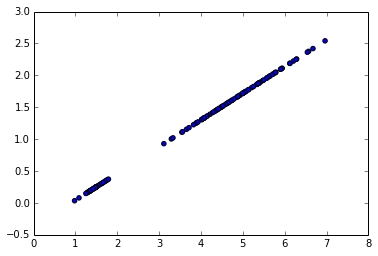

In [62]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])
# it is only looking at 2 dimensions of data!

In [63]:
#############################
### PCA with 3 components  ##
#############################

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

X_3

array([[-2.68420713, -0.32660731,  0.02151184],
       [-2.71539062,  0.16955685,  0.20352143],
       [-2.88981954,  0.13734561, -0.02470924],
       [-2.7464372 ,  0.31112432, -0.03767198],
       [-2.72859298, -0.33392456, -0.0962297 ],
       [-2.27989736, -0.74778271, -0.17432562],
       [-2.82089068,  0.08210451, -0.26425109],
       [-2.62648199, -0.17040535,  0.01580151],
       [-2.88795857,  0.57079803, -0.02733541],
       [-2.67384469,  0.1066917 ,  0.1915333 ],
       [-2.50652679, -0.65193501,  0.069275  ],
       [-2.61314272, -0.02152063, -0.10765035],
       [-2.78743398,  0.22774019,  0.20032779],
       [-3.22520045,  0.50327991, -0.06841363],
       [-2.64354322, -1.1861949 ,  0.1445057 ],
       [-2.38386932, -1.34475434, -0.28373066],
       [-2.6225262 , -0.81808967, -0.14531599],
       [-2.64832273, -0.31913667, -0.03339425],
       [-2.19907796, -0.87924409,  0.11452146],
       [-2.58734619, -0.52047364, -0.21957209],
       [-2.3105317 , -0.39786782,  0.233

In [64]:
# KNN with 3 components
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_3, y, cv=10, scoring='accuracy').mean()

0.96666666666666679

In [65]:
X_reconstituted = pca.inverse_transform(X_3)

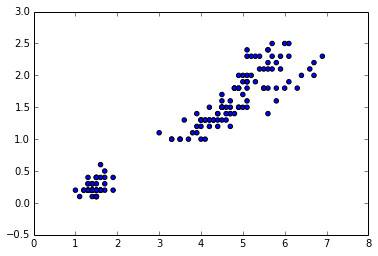

In [66]:
plt.scatter(X[:,2], X[:,3])
# Original Data

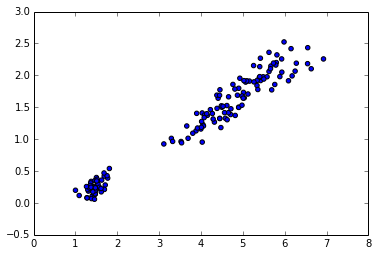

In [67]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

In [68]:
#############################
### choosing components  ####
#############################



pca = decomposition.PCA(n_components=4)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514  0.00518309]


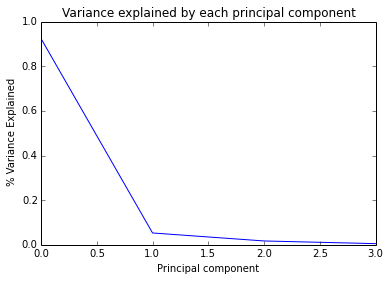

In [69]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

# 2 components is enough!!

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [71]:

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv'
yelp = pd.read_csv(url)

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars == 5

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [73]:
# removing no features
vect = CountVectorizer(stop_words='english')
all_dtm = vect.fit_transform(X)
cross_val_score(lr, all_dtm, y, cv=10, scoring='accuracy').mean()

0.93245414867556398

In [74]:
vect = CountVectorizer(stop_words='english', max_features = 1000)
all_dtm = vect.fit_transform(X)
cross_val_score(lr, all_dtm, y, cv=10, scoring='accuracy').mean()

0.92510417435989145

In [75]:
vect = CountVectorizer(stop_words='english', max_features = 100)
all_dtm = vect.fit_transform(X)
cross_val_score(lr, all_dtm, y, cv=10, scoring='accuracy').mean()

0.88962844802230678

In [ ]:
##############
## EXERCISE ##
##############


# make a count vectorizer with english stopwords and 1,000 max features


# create a variable called all_dtm to fit and transform X













In [ ]:
# make a count vectorizer with english stopwords and 1,000 max features
vect = CountVectorizer(stop_words='english', max_features = 1000)

# create a variable called all_dtm to fit and transform X
all_dtm = vect.fit_transform(X)

In [76]:
# use PCA to reduce all_dtm (which has 1000 features to only have to 100 dimensions
pca = decomposition.PCA(n_components=100)

# PCA cannot take in a sparse matrix, so I include toarray to make the array "dense"
X_r = pca.fit_transform(all_dtm.toarray())

In [77]:
# compare PCA of 100 components to max_features of 100 or 1000
cross_val_score(lr, X_r, y, cv=10, scoring='accuracy').mean()
# Very comparable!

0.91262935513079335

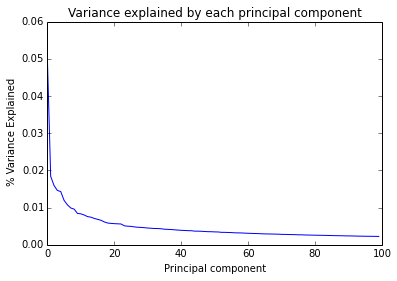

In [79]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

In [82]:
# use PCA to reduce all_dtm (which has 1000 features to only have to 20 dimensions
pca = decomposition.PCA(n_components=20)

# PCA cannot take in a sparse matrix, so I include toarray to make the array "dense"
X_r = pca.fit_transform(all_dtm.toarray())

# compare PCA of 100 components to max_features of 100 or 1000
cross_val_score(lr, X_r, y, cv=10, scoring='accuracy').mean()
# Still very comparable!

0.8869293615032865

Note that PCA does require scaled data, but because I knew that each column was on the same unit ("words")
I did not need to preform any standardization

trying 0 principal components with a distance of: 220.886504
trying 10 principal components with a distance of: 57.006107
trying 20 principal components with a distance of: 37.993758
trying 30 principal components with a distance of: 28.101624
trying 40 principal components with a distance of: 21.989006
trying 50 principal components with a distance of: 17.685536
trying 60 principal components with a distance of: 14.358811
trying 70 principal components with a distance of: 11.752487
trying 80 principal components with a distance of: 9.630962
trying 90 principal components with a distance of: 7.930524
trying 100 principal components with a distance of: 6.584847
trying 110 principal components with a distance of: 5.428057
trying 120 principal components with a distance of: 4.475388
trying 130 principal components with a distance of: 3.656138
trying 140 principal components with a distance of: 2.982499
trying 150 principal components with a distance of: 2.410273
trying 160 principal compo

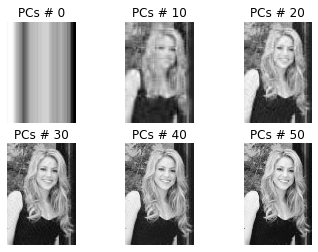

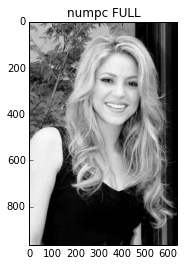

In [26]:
# BONUS SHAKIRA


from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort

def princomp(A, numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

A = imread('../data/shakira.png') # load an image
A = mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    print "trying %s principal components with a distance of: %f"%(numpc,dist[-1])
    if numpc <= 50:
        if numpc == 50:
            imsave(fname= '../data/'+str(numpc)+'.png', arr = Ar)
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1
        imshow(Ar)
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(A)
title('numpc FULL')
gray()
show()